In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

## Set Up Data

In [55]:
df = pd.read_csv('irisdata.csv')   #read the CSV

#encode Species column data as 0, 1, or 2
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
species_name = encoder.classes_

#put into X and Y
X = df.drop(columns=['species'])  # get rid of id and species in X data
y = df['species']   # the species names only

## Divide into Testing and Training Set

In [25]:
from sklearn.model_selection import train_test_split

#use 30% of total data for test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

## Now, we should scale our data values to improve performance speed

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#let's see x before the scaling
print(x_train[:5])

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#and now let's see x after the scaling
print(x_train[:5])

     sepal_length  sepal_width  petal_length  petal_width
89            5.5          2.5           4.0          1.3
149           5.9          3.0           5.1          1.8
98            5.1          2.5           3.0          1.1
144           6.7          3.3           5.7          2.5
17            5.1          3.5           1.4          0.3
[[-0.47215566 -1.28450144  0.08683361  0.07509569]
 [ 0.02237147 -0.17717261  0.71760607  0.73218298]
 [-0.96668279 -1.28450144 -0.48659589 -0.18773923]
 [ 1.01142572  0.48722468  1.06166377  1.65210519]
 [-0.96668279  0.93015621 -1.4040831  -1.2390789 ]]


## We should also send the encoded classes to a matrix

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

## Now, let's define the model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#let's add a dropout layer to avoid overfitting
model.add(Dropout(0.5))

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))


#Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let's see the info of our model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

## Now train the model

In [39]:
#epochs is how many training passes to do over entire training set
model.fit(x_train, y_train, epochs=100, verbose=2)  

Epoch 1/100
4/4 - 1s - 303ms/step - accuracy: 0.3333 - loss: 1.0530
Epoch 2/100
4/4 - 0s - 17ms/step - accuracy: 0.4952 - loss: 0.9782
Epoch 3/100
4/4 - 0s - 14ms/step - accuracy: 0.5048 - loss: 0.9351
Epoch 4/100
4/4 - 0s - 14ms/step - accuracy: 0.6190 - loss: 0.8525
Epoch 5/100
4/4 - 0s - 13ms/step - accuracy: 0.6190 - loss: 0.8321
Epoch 6/100
4/4 - 0s - 12ms/step - accuracy: 0.6762 - loss: 0.7966
Epoch 7/100
4/4 - 0s - 13ms/step - accuracy: 0.6762 - loss: 0.7574
Epoch 8/100
4/4 - 0s - 14ms/step - accuracy: 0.7333 - loss: 0.7217
Epoch 9/100
4/4 - 0s - 13ms/step - accuracy: 0.7238 - loss: 0.6811
Epoch 10/100
4/4 - 0s - 13ms/step - accuracy: 0.7619 - loss: 0.6427
Epoch 11/100
4/4 - 0s - 13ms/step - accuracy: 0.7810 - loss: 0.6654
Epoch 12/100
4/4 - 0s - 13ms/step - accuracy: 0.7810 - loss: 0.6205
Epoch 13/100
4/4 - 0s - 13ms/step - accuracy: 0.7810 - loss: 0.6102
Epoch 14/100
4/4 - 0s - 15ms/step - accuracy: 0.7905 - loss: 0.5899
Epoch 15/100
4/4 - 0s - 13ms/step - accuracy: 0.7810 - l

# Now lets use our test dataset to check our model

In [ ]:
#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: [0 2 2 0 1]
Real values
 22     0
138    2
130    2
37     0
52     1
Name: species, dtype: int64


## Let's check some analysis of how well the model performs

Accuracy Score: 0.9555555555555556
Confusion Matrix:
 [[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


Text(50.722222222222214, 0.5, 'Pctual')

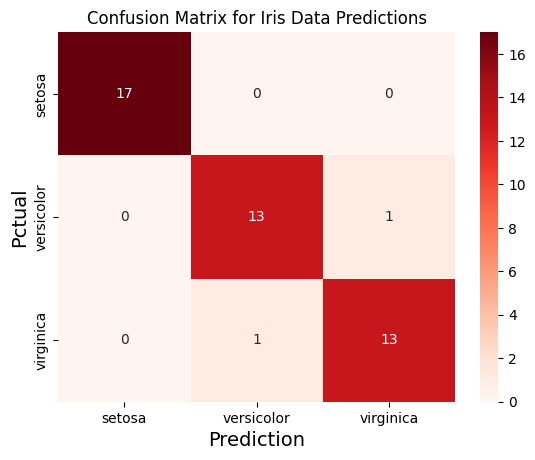

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)